In [1]:
from astropy import units as u

In [2]:
results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/'

# J = 5 - 4
freq_spw_05_04 = '93_spw27'
# fmin_05_04 = 91.958*u.GHz
# fmax_05_04 = 91.988*u.GHz

# NEW as of July 27:
# J = 6 - 5
freq_spw_06_05 = '110_spw29'
# fmin_06_05 = 110.330*u.GHz
# fmax_06_05 = 110.384*u.GHz

# NEW as of July 27:
# J = 7 - 6
freq_spw_07_06 = '130_spw105'
# fmin_07_06 = 128.690*u.GHz
# fmax_07_06 = 128.780*u.GHz

# J = 8 - 7
freq_spw_08_07 = '146_spw51'
# fmin_08_07 = 147.035*u.GHz
# fmax_08_07 = 147.175*u.GHz

# J = 14 - 13
freq_spw_14_13 = '259_spw47' # Used to be '257_spw45' but that covers the k = 9 and higher component
# fmin_14_13 = 255.309*u.GHz # Possibly wrong
# fmax_14_13 = 257.182*u.GHz # Possibly wrong

In [3]:
from spectral_cube import SpectralCube
cube_05_04 = SpectralCube.read(results+'source_ab_'+freq_spw_05_04+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_06_05 = SpectralCube.read(results+'source_ab_'+freq_spw_06_05+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_07_06 = SpectralCube.read(results+'source_ab_'+freq_spw_07_06+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_08_07 = SpectralCube.read(results+'source_ab_'+freq_spw_08_07+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_14_13 = SpectralCube.read(results+'source_ab_'+freq_spw_14_13+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_05_04, cube_06_05, cube_07_06, cube_08_07, cube_14_13

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

(DaskVaryingResolutionSpectralCube with shape=(1920, 512, 512) and unit=K and chunk size (80, 256, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
  n_s:   1920  type_s: FREQ      unit_s: Hz     range: 91425792724.639 Hz:93299566513.404 Hz,
 DaskVaryingResolutionSpectralCube with shape=(1920, 512, 512) and unit=K and chunk size (80, 256, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
  n_s:   1920  type_s: FREQ      unit_s: Hz     range: 109548373997.542 Hz:111422149820.383 Hz,
 DaskVaryingResolutionSpectralCube with shape=(3840, 512, 512) and unit=K and chunk size (128, 256, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    r

In [4]:
# Primary-beam-correct the cubes
pb_05_04 = SpectralCube.read(results+'source_ab_'+freq_spw_05_04+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb', format = 'casa_image')
pb_06_05 = SpectralCube.read(results+'source_ab_'+freq_spw_06_05+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb', format = 'casa_image')
pb_07_06 = SpectralCube.read(results+'source_ab_'+freq_spw_07_06+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb', format = 'casa_image')
pb_08_07 = SpectralCube.read(results+'source_ab_'+freq_spw_08_07+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb', format = 'casa_image')
pb_14_13 = SpectralCube.read(results+'source_ab_'+freq_spw_14_13+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb', format = 'casa_image')

cube_05_04_pbcor = cube_05_04.unitless/(pb_05_04.unitless)
cube_06_05_pbcor = cube_06_05.unitless/(pb_06_05.unitless)
cube_07_06_pbcor = cube_07_06.unitless/(pb_07_06.unitless)
cube_08_07_pbcor = cube_08_07.unitless/(pb_08_07.unitless)
cube_14_13_pbcor = cube_14_13.unitless/(pb_14_13.unitless)

cube_05_04_pbcor_unit = cube_05_04_pbcor * cube_05_04.unit
cube_06_05_pbcor_unit = cube_06_05_pbcor * cube_06_05.unit
cube_07_06_pbcor_unit = cube_07_06_pbcor * cube_07_06.unit
cube_08_07_pbcor_unit = cube_08_07_pbcor * cube_08_07.unit
cube_14_13_pbcor_unit = cube_14_13_pbcor * cube_14_13.unit

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

In [5]:
# Convert from frequency to velocity
cube_05_04_vel = cube_05_04_pbcor_unit.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 91.9870876*u.GHz) # k = 0
cube_06_05_vel = cube_06_05_pbcor_unit.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 110.3834999*u.GHz) # k = 0
cube_07_06_vel = cube_07_06_pbcor_unit.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 128.7793639*u.GHz) # k = 0
cube_08_07_vel = cube_08_07_pbcor_unit.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 147.1745883*u.GHz) # k = 0
cube_14_13_vel = cube_14_13_pbcor_unit.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 257.5273835*u.GHz) # k = 0; 257.1270354 for k = 9

In [6]:
# Get velocity cutout of component
cube_05_04_vel_sub = cube_05_04_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)
cube_06_05_vel_sub = cube_06_05_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)
cube_07_06_vel_sub = cube_07_06_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)
cube_08_07_vel_sub = cube_08_07_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)
cube_14_13_vel_sub = cube_14_13_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)

In [7]:
# Smooth each cube to a common beam for that cube (go from VaryingResolution to regular)
cube_05_04_common_beam = cube_05_04_vel_sub.beams.common_beam()
cube_06_05_common_beam = cube_06_05_vel_sub.beams.common_beam()
cube_07_06_common_beam = cube_07_06_vel_sub.beams.common_beam()
cube_08_07_common_beam = cube_08_07_vel_sub.beams.common_beam()
cube_14_13_common_beam = cube_14_13_vel_sub.beams.common_beam()

cube_05_04_b = cube_05_04_vel_sub.convolve_to(cube_05_04_common_beam)
cube_06_05_b = cube_06_05_vel_sub.convolve_to(cube_06_05_common_beam)
cube_07_06_b = cube_07_06_vel_sub.convolve_to(cube_07_06_common_beam)
cube_08_07_b = cube_08_07_vel_sub.convolve_to(cube_08_07_common_beam)
cube_14_13_b = cube_14_13_vel_sub.convolve_to(cube_14_13_common_beam)

In [8]:
print(cube_05_04_common_beam)
print(cube_06_05_common_beam)
print(cube_07_06_common_beam)
print(cube_08_07_common_beam)
print(cube_14_13_common_beam)

Beam: BMAJ=1.4395686388015747 arcsec BMIN=1.2283142805099487 arcsec BPA=-63.917236328125 deg
Beam: BMAJ=1.4589393138885498 arcsec BMIN=0.9863081574440002 arcsec BPA=-77.9095230102539 deg
Beam: BMAJ=1.6743199825286865 arcsec BMIN=1.3546031713485718 arcsec BPA=-81.17138671875 deg
Beam: BMAJ=1.510909080505371 arcsec BMIN=1.1864451169967651 arcsec BPA=-81.83074951171875 deg
Beam: BMAJ=1.3929436206817627 arcsec BMIN=1.127123236656189 arcsec BPA=-78.29612731933594 deg


In [9]:
# Get common beam between all cubes
import radio_beam
common_beam = radio_beam.commonbeam.common_manybeams_mve(radio_beam.Beams(beams=[cube_05_04_b.beam,
                                                                                 cube_06_05_b.beam,
                                                                                 cube_07_06_b.beam,
                                                                                 cube_08_07_b.beam,
                                                                                 cube_14_13_b.beam]))
common_beam

Beam: BMAJ=1.6753246582342027 arcsec BMIN=1.3554160009815395 arcsec BPA=98.82861328125003 deg

In [10]:
cube_05_04_b_resample_spat = cube_05_04_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)
cube_06_05_b_resample_spat = cube_06_05_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)
cube_07_06_b_resample_spat = cube_07_06_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)
cube_08_07_b_resample_spat = cube_08_07_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)
cube_14_13_b_resample_spat = cube_14_13_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)

In [11]:
import matplotlib.pyplot as plt

In [12]:
mom0_05_04 = cube_05_04_b_resample_spat.moment0()
mom0_06_05 = cube_06_05_b_resample_spat.moment0()
mom0_07_06 = cube_07_06_b_resample_spat.moment0()
mom0_08_07 = cube_08_07_b_resample_spat.moment0()
mom0_14_13 = cube_14_13_b_resample_spat.moment0()

# ax = plt.subplot(projection=mom0_05_04.wcs)
# im = ax.imshow(mom0_05_04.value, origin='lower', cmap='inferno')
# cbar = plt.colorbar(im)
# cbar.set_label(f'Integrated Intensity [{mom0_05_04.unit}]')
# ax.set_ylabel('Declination')
# ax.set_xlabel('Right Ascension')

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/blue/adamginsb

In [13]:
SM_SIZE = 12
MD_SIZE = 16
LG_SIZE = 22

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

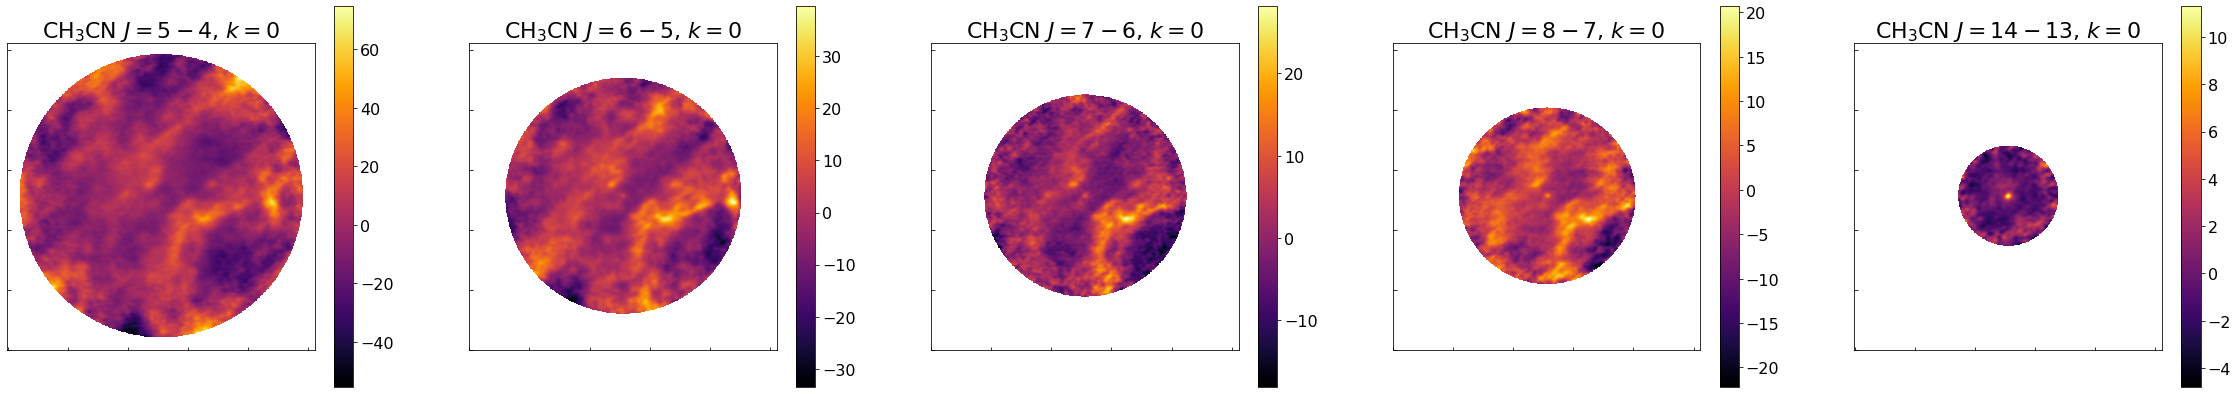

In [14]:
plt.figure(figsize = (40, 7))

ax1 = plt.subplot(151,) # projection = mom0_05_04.wcs, aspect = 1)
ax2 = plt.subplot(152,)
ax3 = plt.subplot(153,)
ax4 = plt.subplot(154,)
ax5 = plt.subplot(155,)

im1 = ax1.imshow(mom0_05_04.value, origin = 'lower', cmap = 'inferno')
im2 = ax2.imshow(mom0_06_05.value, origin = 'lower', cmap = 'inferno')
im3 = ax3.imshow(mom0_07_06.value, origin = 'lower', cmap = 'inferno')
im4 = ax4.imshow(mom0_08_07.value, origin = 'lower', cmap = 'inferno')
im5 = ax5.imshow(mom0_14_13.value, origin = 'lower', cmap = 'inferno')

cbar1 = plt.colorbar(mappable = im1, ax = ax1)
cbar2 = plt.colorbar(mappable = im2, ax = ax2)
cbar3 = plt.colorbar(mappable = im3, ax = ax3)
cbar4 = plt.colorbar(mappable = im4, ax = ax4)
cbar5 = plt.colorbar(mappable = im5, ax = ax5)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.tick_params(direction = 'in')
    ax.xaxis.set_tick_params(labelbottom = False)
    ax.yaxis.set_tick_params(labelleft = False)
    
ax1.set_title("CH$_3$CN $J = 5 - 4$, $k = 0$")
ax2.set_title("CH$_3$CN $J = 6 - 5$, $k = 0$")
ax3.set_title("CH$_3$CN $J = 7 - 6$, $k = 0$")
ax4.set_title("CH$_3$CN $J = 8 - 7$, $k = 0$")
ax5.set_title("CH$_3$CN $J = 14 - 13$, $k = 0$") # Used to be k = 9

plt.rcParams.update({
    "figure.facecolor":  'none',
    "axes.facecolor":    'w',
    "savefig.facecolor": 'none'
})

plt.savefig("m0_maps_NEW.pdf", facecolor = 'w', edgecolor = 'w', bbox_inches = 'tight')
plt.savefig("m0_maps_NEW.png", dpi = 250, bbox_inches = 'tight')
plt.savefig("/blue/adamginsburg/abulatek/brick/first_results/figures/moments_alyssa/m0_maps_NEW.png", dpi = 250, bbox_inches = 'tight')